## Basic k-means and PCA in application to the hand-written digits dataset
The dataset is available directly in sklearn, see the documentation of the function load_digits(): 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html, 

or at UCI ML: https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

## Imports

In [7]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Load the dataset from sklearn 

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()

## Explore the data

In [9]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### Check the size of the dataset: we have 1794 images of 8x8 pixels

In [10]:
digits.data.shape

(1797, 64)

### Target variable
The labels (digits corresponding to the image) are stored at `digits.targets`. The labels are numbers from 0 to 9. 

In [11]:
digits.target.shape

(1797,)

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
set(digits.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### Features are 8x8 black-and-white images of handwritten digits.

They are stored at `digit.images` as 8x8 numpy arrays.

In [9]:
digits.images.shape

(1797, 8, 8)

And they are also stored as flattened 64-dimensional numpy arrays at `digits.data`

In [10]:
digits.data.shape

(1797, 64)

`digits.images` is useful for visualisation of images

<Figure size 640x480 with 0 Axes>

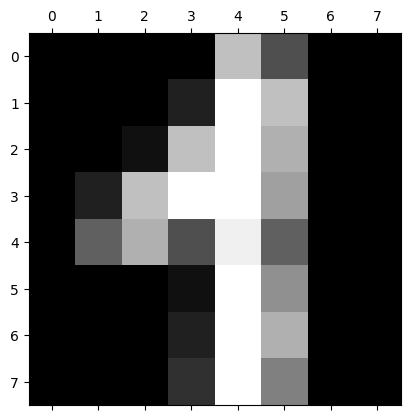

In [14]:
plt.gray()
plt.matshow(digits.images[42])
plt.show()

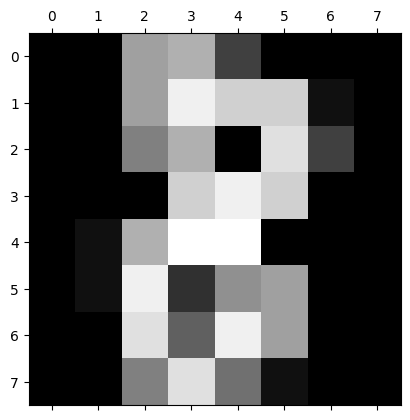

In [15]:
plt.matshow(digits.images[28])

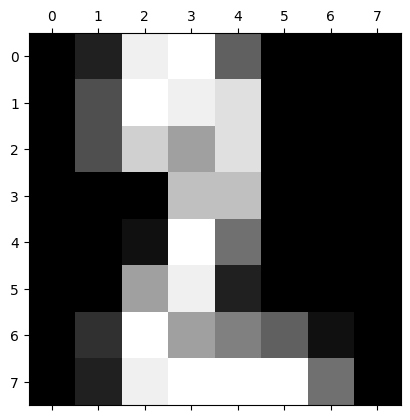

In [16]:
plt.matshow(digits.images[132])

## Apply PCA for visualisation

Use PCA from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce 64 dimensional feature vectors to dimension 2 for visualisation.

In [17]:
pca = PCA(n_components=2)
pca.fit(np.transpose(digits.data))

PCA(n_components=2)

Now we have a two-dimensional vector corresponding to each image.

In [18]:
pca.components_.shape

(2, 1797)

The function below can be used for visualisation of the digits data.

In [19]:
def plot_clusters(data, clusters, legend=False):
    """Visualises 2d-data using a different color for each cluster."""
    plt.figure(figsize=(12,10))
    colornames = list(mcolors.CSS4_COLORS.keys())
    random.Random(87).shuffle(colornames)
    plt.scatter(
        data[0], 
        data[1], 
        color=[colornames[t] for t in clusters]
    )
    if legend:
        clusters_ids = list(set(clusters))
        legend_elements = [
            Patch(facecolor=colornames[t], edgecolor='black', label=t) 
            for t in clusters_ids
        ]
        plt.legend(handles=legend_elements)
    
    

The cell below visualises the data and colors each point according to its label (e.g the digits '8' are blue).

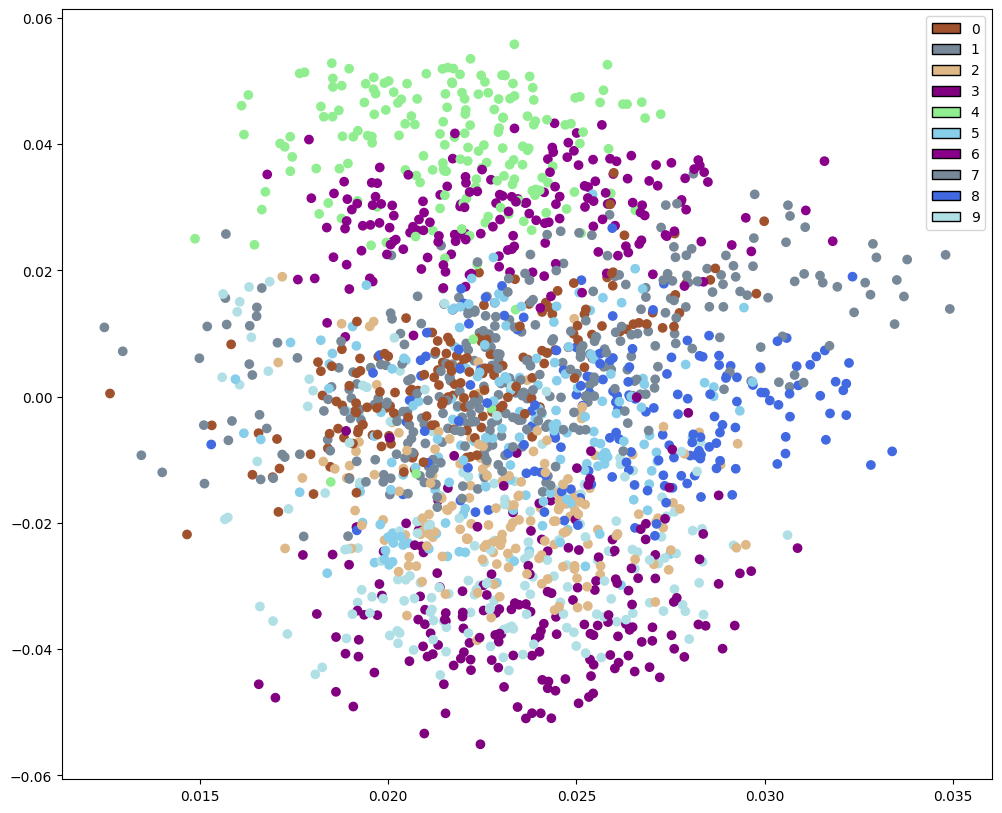

In [20]:
plot_clusters(pca.components_, digits.target, legend=True)

### Exercise 1. 
Pick a few outliers (points that are far from the main cloud) and look at the corresponding images using `plt.matshow`. Then pick a few points from the center of the cloud and look at them too. Compare the results.

In [43]:
### Enter your solution here...
outliers= []
centers = []
for i in range (len(pca.components_[0])):
    data = pca.components_[0][i],pca.components_[1][i]
    if(data[0]<0.015):
        outliers.append(data)
        print("outlier ",data)
    if(abs(data[0]-0.023)<0.005  and abs(data[1]+0.01)<0.03):
        centers.append(data)
        print("center ",data)



ter  (0.021401705906693474, -0.0104712197114236)
center  (0.020480805626773995, -0.020075679869612388)
center  (0.02447625973727747, 0.01430851893178607)
center  (0.02435370524799935, 0.008819714859216923)
center  (0.02203667746741006, -0.0016413490390426542)
center  (0.021460900725731084, -0.0007849521516206237)
center  (0.02530568156227725, -0.03317383627300706)
center  (0.024645808307076803, -0.02694733044468187)
center  (0.022889493335564705, -0.0028676378142455613)
center  (0.021878368192090353, -0.003857581441887812)
center  (0.02289273768854315, -0.02287792095211701)
center  (0.020587174768845185, 0.0008960894163240305)
center  (0.022862352524103725, 0.012666445021332807)
center  (0.0245412325716221, -0.0332869099107285)
center  (0.020991529767665912, -0.007414106882659194)
center  (0.02760658059728964, -0.030499884696529464)
center  (0.021921169812954493, 0.014237085666836758)
center  (0.01850696532508508, 0.004825912085288692)
center  (0.027346914048181573, -0.0255757264281887

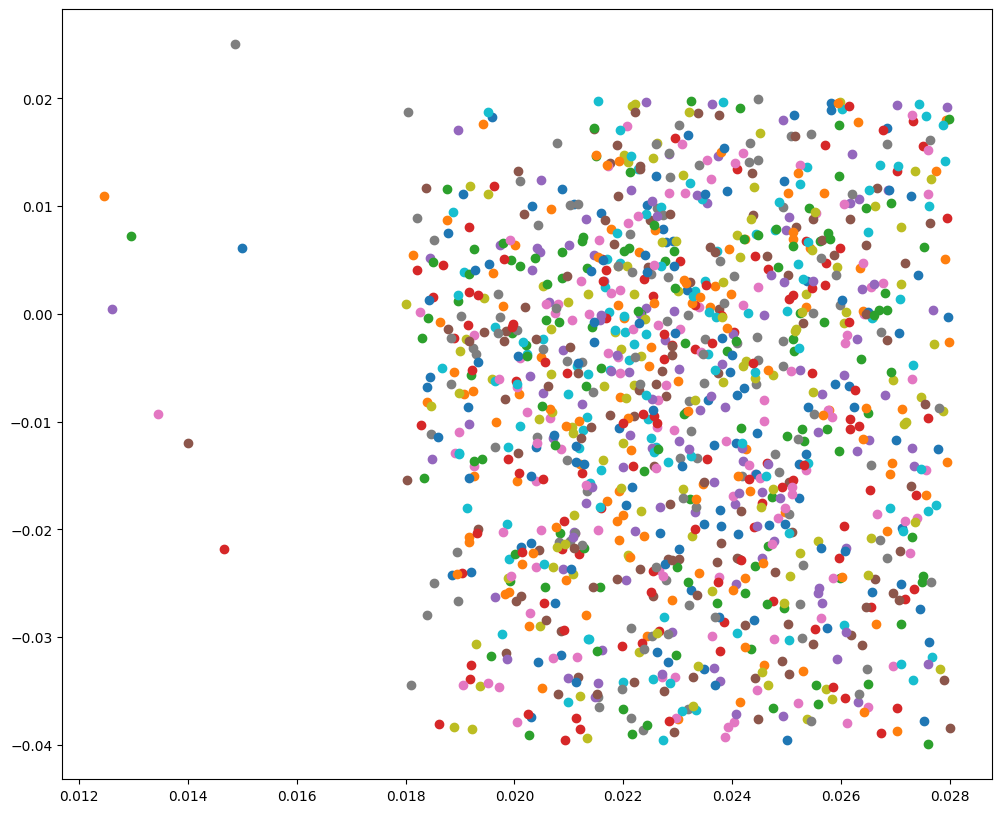

In [44]:
plt.figure(figsize=(12,10))
for data in outliers+centers:
    plt.scatter(
        data[0], 
        data[1],
    )
plt.show()

In [33]:
# Apply K means

Use k-means from sklearn to clusterize the digits data. 
We use k=10 as we know that we have only 10 types of digits.

In [45]:
kmeans = KMeans(n_clusters=10, random_state=0).fit_predict(digits.data)

In [46]:
kmeans.shape

(1797,)

In [47]:
set(kmeans)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Visualise clusters from kmeans using pca components computed in the previous section.
Note that the poisitions of points are the same before, but colors might be a little different. 
The coloring now corresponds to the output of kmeans, not to the digit associated with the datapoint.

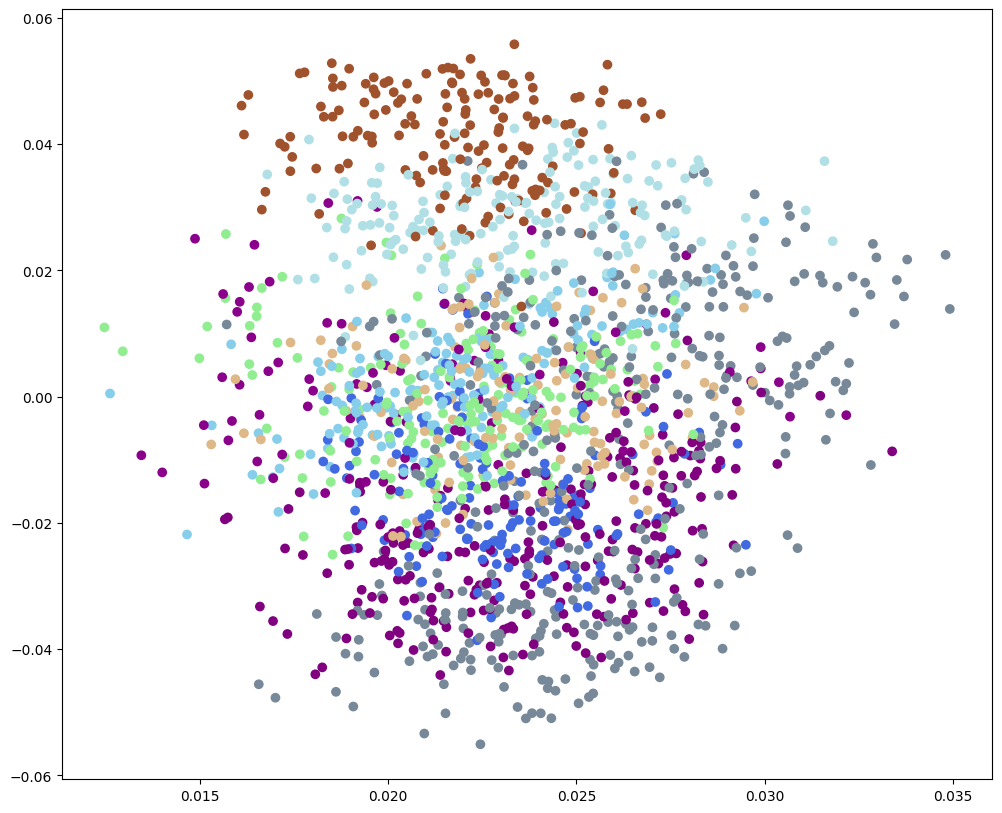

In [48]:
plot_clusters(pca.components_, kmeans)

## Check data from one cluster

Let's check the labels of the data from one cluster returned by k-means.

In [23]:
digits.target[kmeans == 0]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

We see that most of the images in this cluster correspond to the digit 4. Let's check the accuracy of predicting that all images in this cluster are 4.

In [49]:
cluster_4 = digits.target[kmeans == 0]
np.sum(cluster_4 == 4)/len(cluster_4)

0.9819277108433735

Here are the number from the "4" cluster that are not equal to 4. There are only 3 of them.

In [25]:
cluster_4[cluster_4 != 4]

array([5, 0, 5])

Let's visualise them.

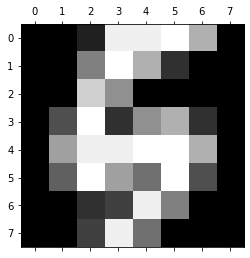

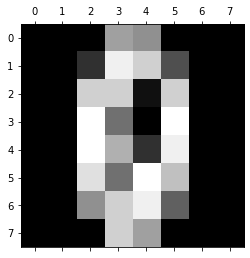

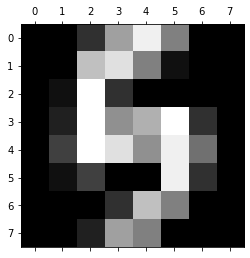

In [26]:
not_4_imgs = digits.images[(kmeans == 0) & (digits.target != 4)]
for img in not_4_imgs:
    plt.matshow(img)

### Exercise 2. 
Find the cluster that has the highest amount of non-dominant digits and visualise the non-dominant digits from that cluster.

In [126]:
### Enter your solution here...
digits.target[kmeans == 1]
print("index","value","rate",'nb_non-dominant',"non_dominant_values")
hist = []
for i in set(kmeans):
    cluster_ = digits.target[kmeans == i]
    unique_values,values_count = np.unique(cluster_,return_counts=True)
    dominant_index = np.argmax(values_count)
    # print(unique_values[dominant_index],values_count[dominant_index])

    dominant_val = unique_values[dominant_index]
    non_dominant_val = np.delete(unique_values,dominant_index)
    
    # mediane = np.median(np.sort(cluster_)) not work
    print(i,dominant_val,values_count[dominant_index]/len(cluster_),np.sum(cluster_ != dominant_val),non_dominant_val)
    hist.append( (i,dominant_val,values_count[dominant_index]/len(cluster_),np.sum(cluster_ != dominant_val),non_dominant_val))


index value rate nb_non-dominant non_dominant_values
0 4 0.9819277108433735 3 [0 5]
1 3 0.875 22 [1 2 8 9]
2 5 0.912751677852349 13 [1 3 8 9]
3 9 0.556 111 [2 3 5 8]
4 7 0.8592233009708737 29 [2 3 4 8 9]
5 0 0.9888268156424581 2 [2 6]
6 1 0.6111111111111112 35 [2 4 6 8 9]
7 8 0.44642857142857145 124 [1 2 3 4 6 7 9]
8 2 0.8457142857142858 27 [1 8]
9 6 0.9725274725274725 5 [1 5 8]


In [133]:
hist

[(0, 4, 0.9819277108433735, 3, array([0, 5])),
 (1, 3, 0.875, 22, array([1, 2, 8, 9])),
 (2, 5, 0.912751677852349, 13, array([1, 3, 8, 9])),
 (3, 9, 0.556, 111, array([2, 3, 5, 8])),
 (4, 7, 0.8592233009708737, 29, array([2, 3, 4, 8, 9])),
 (5, 0, 0.9888268156424581, 2, array([2, 6])),
 (6, 1, 0.6111111111111112, 35, array([2, 4, 6, 8, 9])),
 (7, 8, 0.44642857142857145, 124, array([1, 2, 3, 4, 6, 7, 9])),
 (8, 2, 0.8457142857142858, 27, array([1, 8])),
 (9, 6, 0.9725274725274725, 5, array([1, 5, 8]))]

In [137]:
np.min(hist[:][2]).all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()